In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

from mplsoccer import FontManager
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(2302764)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [4]:
pd.set_option('display.max_columns', None)
shots.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,outcome_name,under_pressure,counterpress,pass_cross,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,out,pass_switch,pass_shot_assist,dribble_overrun,ball_recovery_recovery_failure,aerial_won,pass_deflected,foul_committed_advantage,foul_won_advantage,foul_won_defensive,dribble_nutmeg,substitution_replacement_id,substitution_replacement_name,pass_miscommunication,foul_committed_offensive,pass_cut_back,block_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,pass_no_touch,block_save_block,foul_committed_card_id,foul_committed_card_name,shot_redirect,block_deflection
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
08eb8fb6-02d1-4124-92e7-2fed285e9b81,40,1,00:00:51.155000,0,51,4,0.678002,2302764,16,Shot,243,AC Milan,3,From Free Kick,243,AC Milan,None,15116.0,Paolo Maldini,6.0,Left Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.6,87.0,Open Play,40.0,Right Foot,107.6,42.1,97.0,Goal,NaN,NaN,NaN,NaN,NaN,0.064727,2.2,0cdab0d4-29f6-48ec-a5a0-21dc85cd268c,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0afba362-b890-445f-a2e8-a880fdf6caf1,126,1,00:03:48.106000,3,48,11,0.304889,2302764,16,Shot,24,Liverpool,2,From Corner,24,Liverpool,None,34386.0,John Arne Semundseth Riise,16.0,Left Midfield,NaN,NaN,NaN,NaN,NaN,NaN,107.1,38.5,87.0,Open Play,38.0,Left Foot,98.4,33.3,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.031492,NaN,883f6fb5-e598-4fe4-84a4-99dfa08bc5b7,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1f292c0-5590-4108-b3bf-36d4f4aaf756,133,1,00:03:57.139000,3,57,12,0.614283,2302764,16,Shot,24,Liverpool,1,Regular Play,24,Liverpool,None,34389.0,Sami Hyypiä,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,119.2,41.9,87.0,Open Play,37.0,Head,106.9,44.4,100.0,Saved,NaN,NaN,NaN,NaN,NaN,0.034621,0.6,c9a47fc7-36dd-4295-b101-575756907433,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef380ac5-5548-4102-85dc-03f6e68a72e2,334,1,00:09:34.205000,9,34,24,0.405298,2302764,16,Shot,243,AC Milan,4,From Throw In,243,AC Milan,None,20142.0,Ivan Gennaro Gattuso,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,100.2,47.0,87.0,Open Play,40.0,Right Foot,86.5,53.5,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.006152,NaN,2afe7633-6c7f-4ccd-b900-2a09d8687262,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64cc7e5d-31f8-4ec0-9df6-ebe9b1d2880b,477,1,00:13:36.820000,13,36,36,0.410617,2302764,16,Shot,243,AC Milan,2,From Corner,243,AC Milan,None,34394.0,Hernán Jorge Crespo,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,119.8,42.8,87.0,Open Play,37.0,Head,114.9,50.2,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.045944,NaN,1c246a65-f15a-4919-b162-17cb4f6933b0,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


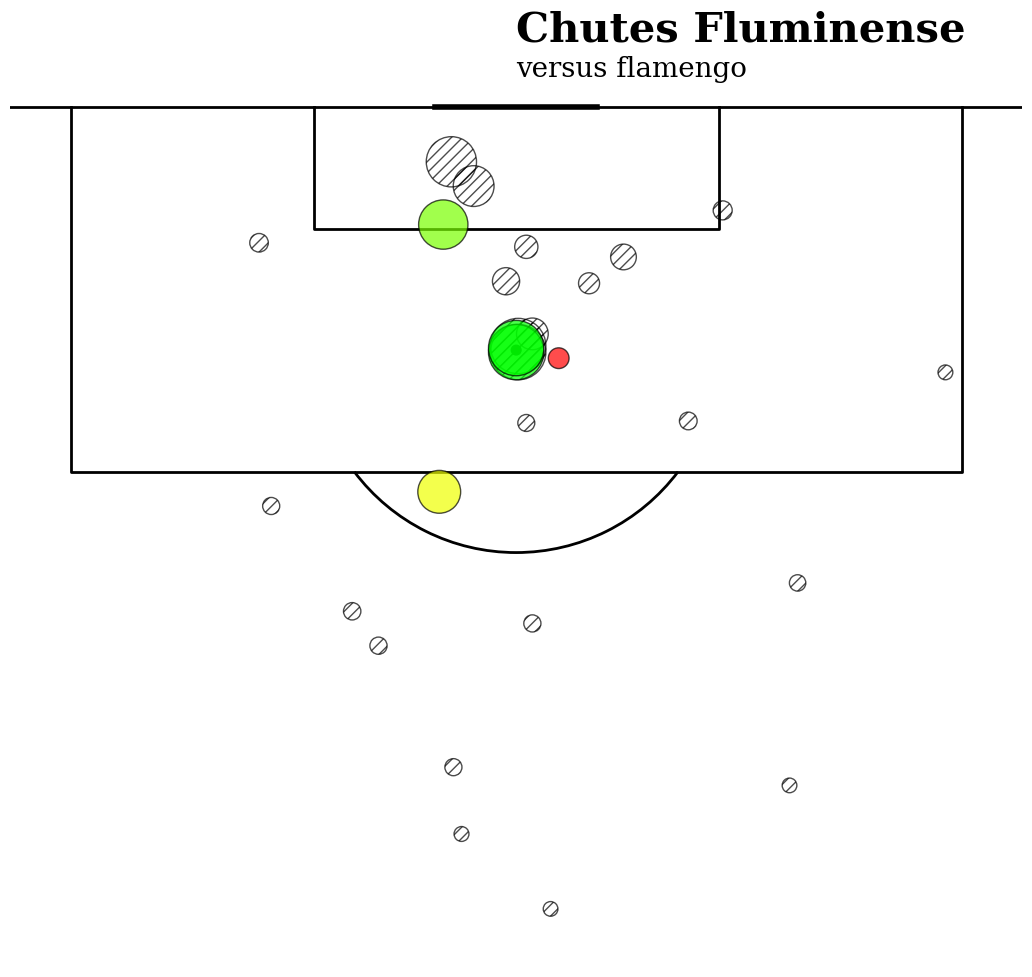

In [5]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
# Define a custom color map with a gradient of colors
colors = [(0, '#FF0000'), (0.5, '#FFFF00'), (1, '#00FF00')]
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Set the font properties for the title
title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}

# Create the pitch object with enhanced aesthetics
pitch = VerticalPitch(pad_top=0.5, pad_bottom=-20, pad_left=-15, pad_right=-15, half=True, goal_type='line', line_color='black')

# Create the figure and axes for the pitch
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)

# Filter goals / non-shot goals
df_shots_england = shots[(shots.type_name == 'Shot') & (shots.team_name == team1)].copy()
df_goals_england = df_shots_england[df_shots_england.outcome_name == 'Goal'].copy()
df_non_goal_shots_england = df_shots_england[df_shots_england.outcome_name != 'Goal'].copy()

# Plot non-goal shots with hatch and custom color map
sc1 = pitch.scatter(df_non_goal_shots_england.x, df_non_goal_shots_england.y,
                    s=(df_non_goal_shots_england.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='black', c='None', hatch='///', marker='o', cmap=cmap, alpha=0.7, ax=axs['pitch'])

# Plot goal shots with a color gradient
sc2 = pitch.scatter(df_goals_england.x, df_goals_england.y,
                    s=(df_goals_england.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='black', c=df_goals_england.shot_statsbomb_xg, cmap=cmap, marker='o', alpha=0.7, ax=axs['pitch'])

# Set the title text with custom font properties
title1 = axs['title'].text(0.5, 0.7, "Chutes Fluminense", fontdict=title_font)
title2 = axs['title'].text(0.5, 0.25, "versus flamengo", fontdict={'family': 'serif', 'color': 'black', 'size': 20})

plt.savefig('s1.png', bbox_inches='tight')